In [ ]:
#!pip install --user --upgrade pip

#!pip install opencv-python
#!pip install h5py
#!pip install keras

In [1]:
import cv2
import numpy as np
import h5py

import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import sys 
import os

sys.path.append(os.path.abspath("../"))

[610, 155, 639, 228, 0]


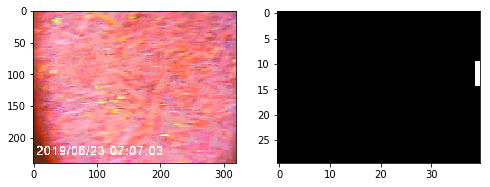

In [16]:
import lib

file_name = '../Etiquetado/bounds2.txt'
boundsdict, _ = lib.Utils.openBounds(file_name)

cap = cv2.VideoCapture('../DCIM/saturated-noaudio.avi')
racap = lib.RACapWrapper(cap, 30)

plot = True

x_scaling = 0.5
y_scaling = x_scaling/8

height, width = None, None

x_data = []
y_data = []

for frame_n in sorted(boundsdict.keys()):    
    frame, _ = racap.readAt(frame_n)        
    
    if height is None:
        [height, width, _] = frame.shape   
        
    for bound in boundsdict[frame_n]:        
        x = cv2.resize(frame, None, fx=x_scaling, fy=x_scaling, interpolation=cv2.INTER_NEAREST)
        x = x.astype('float32')/255        
        x_data.append(x)        
        
        y = np.zeros((height, width))
        y = cv2.rectangle(y, tuple(bound[0:2]), tuple(bound[2:4]), 1, cv2.FILLED)
        y = cv2.resize(y, None, fx=y_scaling, fy=y_scaling, interpolation=cv2.INTER_NEAREST)     
        
        if plot:
            print(bound)
            fig = plt.figure(figsize=(8, 8))
            
            fig.add_subplot(1, 2, 1)                
            plt.imshow(x)
            
            fig.add_subplot(1, 2, 2)
            plt.imshow(y, cmap='gray')
        
        y = np.expand_dims(y, axis=2).astype('float32')        
        y_data.append(y)        

    break
            
cap.release()

data_fila = h5py.File('data.h5', 'w')

data_fila.create_dataset('x_data', data = x_data)
data_fila.create_dataset('y_data', data = y_data)

data_fila.close()